In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from astropy.units import Quantity
from astropy.coordinates import Angle

from gammapy.data import DataStore
from gammapy.irf import EnergyDependentMultiGaussPSF
from gammapy.datasets import gammapy_extra

dirname = gammapy_extra.filename('datasets/hess-crab4-hd-hap-prod2')
data_store = DataStore.from_dir(dirname)

# Reference values for energy and theta
energy = Quantity(1, 'TeV')
theta = Angle(0, 'deg')

psf = data_store.obs(obs_id=23523).psf
psf_1TeV = psf.psf_at_energy_and_theta(energy, theta)

# Convert to table PSF
table_psf = psf.to_table_psf(theta)
table_psf_1TeV = table_psf.table_psf_at_energy(energy)

/home/hfm/adonath/Software/Repositories/gammapy/gammapy/morphology/gauss.py:254: RuntimeWarning: invalid value encountered in true_divide
  self.norms /= self.integral
/home/hfm/adonath/Software/Repositories/gammapy/gammapy/morphology/gauss.py:57: RuntimeWarning: divide by zero encountered in double_scalars
  amplitude = 1 / (2 * np.pi * self._sigma2)
/home/hfm/adonath/Software/Repositories/gammapy/gammapy/morphology/gauss.py:58: RuntimeWarning: divide by zero encountered in true_divide
  exponent = -0.5 * theta2 / self._sigma2
/home/hfm/adonath/Software/Repositories/gammapy/gammapy/morphology/gauss.py:58: RuntimeWarning: invalid value encountered in true_divide
  exponent = -0.5 * theta2 / self._sigma2
/home/hfm/adonath/Software/Repositories/gammapy/gammapy/morphology/gauss.py:59: RuntimeWarning: invalid value encountered in multiply
  return amplitude * np.exp(exponent)


# PSF profile

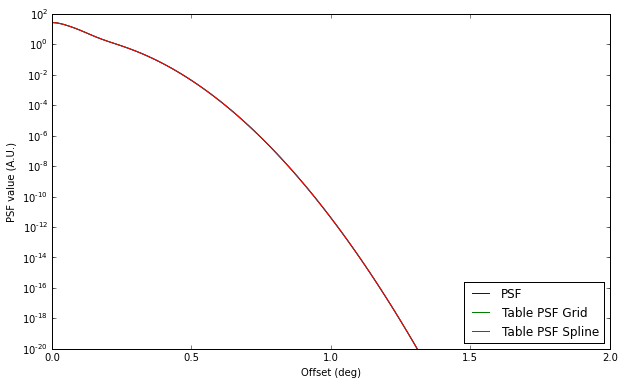

In [3]:
plt.figure(figsize=(10, 6))
offsets = Angle(np.arange(0, 2, 0.02), 'deg')
psf_value = psf_1TeV(offsets, np.zeros_like(offsets))

plt.plot(offsets, psf_value, label='PSF')
plt.plot(table_psf_1TeV._offset.to('deg'), table_psf_1TeV._dp_domega.to('deg^-2'), label='Table PSF Grid')
plt.plot(offsets, table_psf_1TeV.evaluate(offsets).to('deg^-2'), label='Table PSF Spline')
plt.xlabel('Offset (deg)')
plt.ylabel('PSF value (A.U.)')
plt.semilogy()

plt.xlim(0, 2)
plt.ylim(10 ** -20)
plt.legend(loc='lower right')

# Containment radius

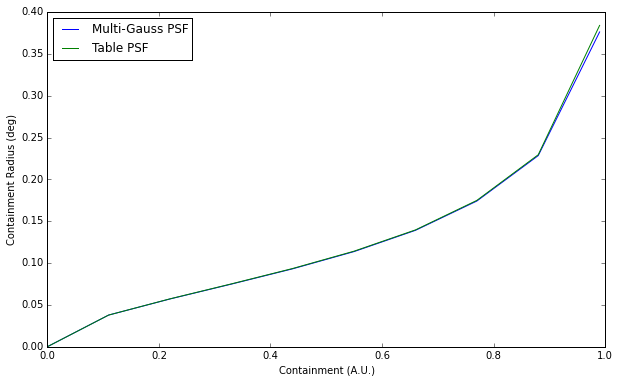

In [4]:
plt.figure(figsize=(10, 6))
# Plot containment radius vs. containment
containment = np.linspace(0, 0.99, 10)

psf_1TeV_cont = [psf_1TeV.containment_radius(_) for _ in containment]
table_psf_1TeV_cont = table_psf_1TeV.containment_radius(containment)

plt.plot(containment, psf_1TeV_cont, color='b', label='Multi-Gauss PSF')
plt.plot(containment, table_psf_1TeV_cont, color='g', label='Table PSF')
plt.xlabel('Containment (A.U.)')
plt.ylabel('Containment Radius (deg)')
plt.legend(loc='upper left')

# Compute  PSF in energy band

In [5]:
eband = Quantity([1, 30], 'TeV')
table_psf_1_to_30_TeV = table_psf.table_psf_in_energy_band(eband)
table_psf_30_TeV = table_psf.table_psf_at_energy(eband[1])

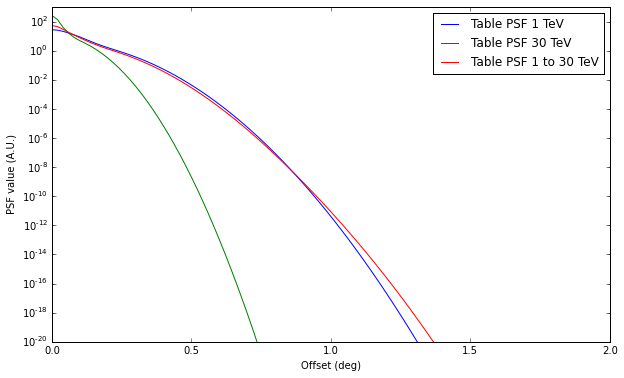

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(offsets, table_psf_1TeV.evaluate(offsets).to('deg^-2'), label='Table PSF 1 TeV')
plt.plot(offsets, table_psf_30_TeV.evaluate(offsets).to('deg^-2'), label='Table PSF 30 TeV')
plt.plot(offsets, table_psf_1_to_30_TeV.evaluate(offsets).to('deg^-2'), label='Table PSF 1 to 30 TeV')
plt.xlabel('Offset (deg)')
plt.ylabel('PSF value (A.U.)')
plt.semilogy()

plt.xlim(0, 2)
plt.ylim(10 ** -20)
plt.legend(loc='upper right')